# Oef

## Imports

In [1]:
from IPython import InteractiveShell
from functions.functions_Y2.ANN import *
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.src.optimizers import RMSprop
from livelossplot import PlotLossesKeras
from keras.src.utils import plot_model

InteractiveShell.ast_node_interactivity = "all"

## Oef 1.

### a)

In [2]:
simps = pd.read_csv('../../../data_aux/The Simpsons original.csv')

simps

,name,hair length,weight,age,gender
0,Homer,0,250,36,M
1,Marge,10,150,34,F
2,Bart,2,90,10,M
3,Lisa,6,78,8,F
4,Maggie,4,20,1,F
5,Abe,1,170,70,M
6,Selma,8,160,41,F
7,Otto,10,180,38,M
8,Krusty,6,200,45,M


### b)
classificatie

### c)
- Name

### d)

In [3]:
x_simpsons = simps[['hair length', 'weight', 'age']]

x_simpsons = normalized_values(x_simpsons, min_max_norm)

x_simpsons

y4_simpsons = simps[['gender']]

y4_simpsons = y4_simpsons['gender'].apply(lambda x: 0 if x == 'M' else 1)

y4_simpsons = to_categorical(y4_simpsons)

y4_simpsons

,hair length,weight,age
0,0.0,1.000000,0.507246
1,1.0,0.565217,0.478261
2,0.2,0.304348,0.130435
3,0.6,0.252174,0.101449
4,0.4,0.000000,0.000000
5,0.1,0.652174,1.000000
6,0.8,0.608696,0.579710
7,1.0,0.695652,0.536232
8,0.6,0.782609,0.637681


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### e)

In [4]:
inputs = Input(shape=(3,))
hidden_ = Dense(6, activation='sigmoid')(inputs)
hidden_ = Dense(4, activation='sigmoid')(hidden_)
outputs = Dense(2, activation='softmax')(hidden_)

model = Model(inputs, outputs, name="Simpsons_NN")
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [5]:
history = model.fit(x_simpsons, y4_simpsons, epochs=200, callbacks=[PlotLossesKeras()], verbose=1)

accuracy
	accuracy         	 (min:    0.556, max:    0.889, cur:    0.778)
Loss
	loss             	 (min:    0.291, max:    0.745, cur:    0.291)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7778 - loss: 0.2909


In [6]:
model.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188 (756.00 B)

 Trainable params: 62 (248.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 126 (508.00 B)

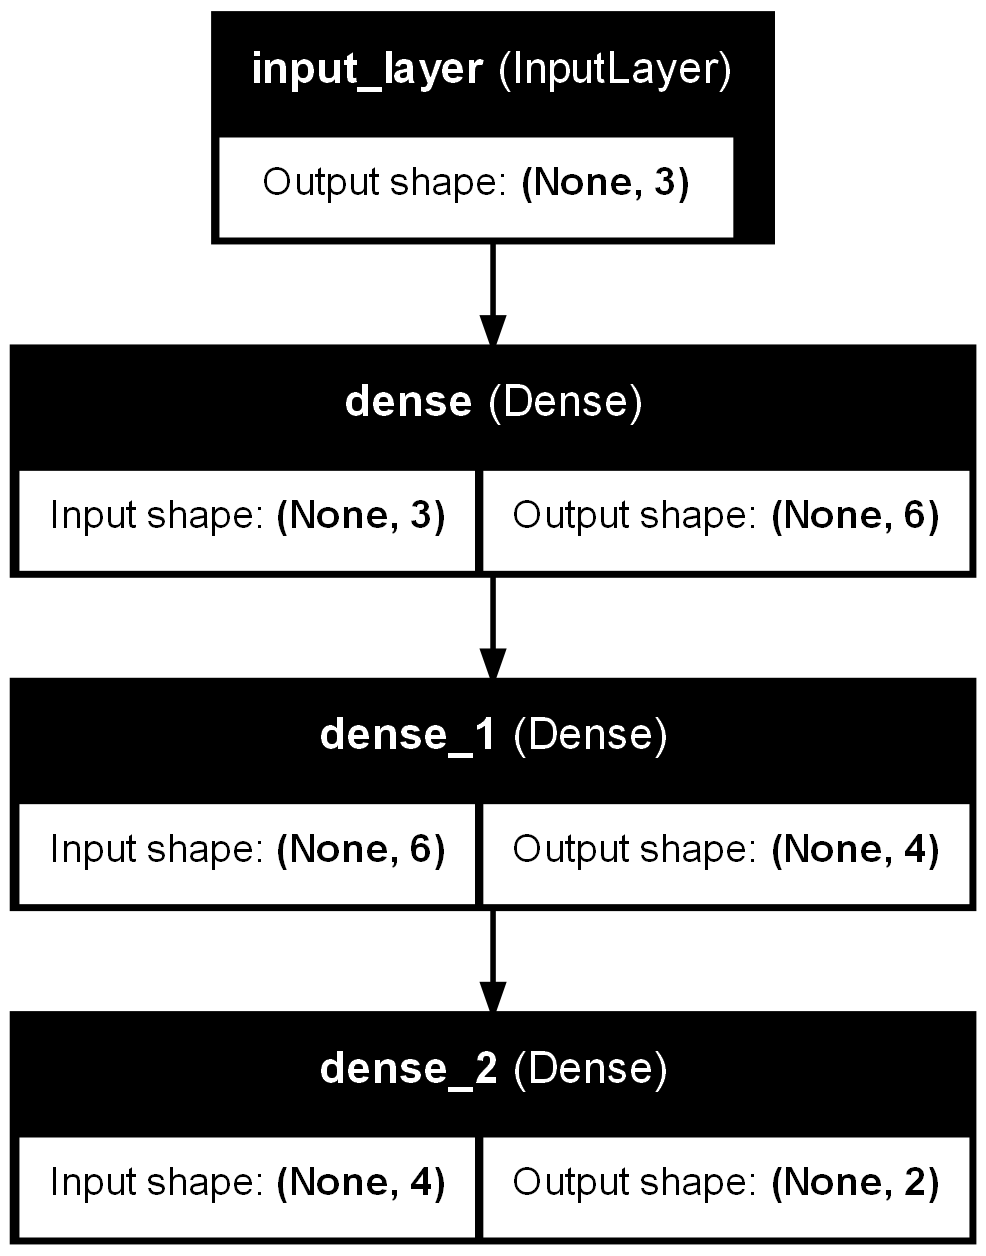

In [7]:
plot_model(model, to_file='model_simpsons_plot.png', show_shapes=True, show_layer_names=True)

### f)

In [ ]:
prediction = model.predict(x_simpsons)
prediction

In [9]:
simps.join(pd.DataFrame(np.argmax(prediction, axis=1), columns=['Prediction'])['Prediction'].apply(
    lambda x: 'M' if x == 0 else 'F'))

,name,hair length,weight,age,gender,Prediction
0,Homer,0,250,36,M,M
1,Marge,10,150,34,F,F
2,Bart,2,90,10,M,M
3,Lisa,6,78,8,F,F
4,Maggie,4,20,1,F,F
5,Abe,1,170,70,M,M
6,Selma,8,160,41,F,M
7,Otto,10,180,38,M,F
8,Krusty,6,200,45,M,M


## Oef 2.

### a)

In [10]:
forecast = pd.read_csv('../../../data_aux/forcastdemo.csv', delimiter=";")

forecast

,Year,Quarter,Revenu
0,1,1,20
1,1,2,100
2,1,3,175
3,1,4,13
4,2,1,37
5,2,2,136
6,2,3,245
7,2,4,26
8,3,1,75
9,3,2,155


### b)
regressie

### c)
- Eerste 2 input
- Laatse output

### d)

In [11]:
x_forecast = forecast[['Year', 'Quarter']]

x_forecast

y_forecast = forecast[['Revenu']]

y_forecast = normalized_values(y_forecast, min_max_norm)

y_forecast

,Year,Quarter
0,1,1
1,1,2
2,1,3
3,1,4
4,2,1
5,2,2
6,2,3
7,2,4
8,3,1
9,3,2


,Revenu
0,0.016204
1,0.201389
2,0.375000
3,0.000000
4,0.055556
5,0.284722
6,0.537037
7,0.030093
8,0.143519
9,0.328704


### e)

In [12]:
inputs_ = Input(shape=(2,))
hidden_ = Dense(4, activation='relu')(inputs_)
hidden_ = Dense(8, activation='relu')(hidden_)
hidden_ = Dense(16, activation='relu')(hidden_)
hidden_ = Dense(8, activation='relu')(hidden_)
hidden_ = Dense(4, activation='relu')(hidden_)
hidden_ = Dense(2, activation='relu')(hidden_)
outputs_ = Dense(1, activation='linear')(hidden_)

model_ = Model(inputs_, outputs_, name='Regression_NN')

model_.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss=keras.losses.MeanAbsoluteError(),
              metrics=['MeanAbsolutePercentageError'])

In [13]:
history = model_.fit(x_forecast, y_forecast, epochs=1000, callbacks=[PlotLossesKeras()], verbose=1)

In [ ]:
model_.summary()

In [ ]:
plot_model(model_, to_file='model_Forecast_NN.png', show_shapes=True, show_layer_names=True)

In [ ]:
prediction = pd.DataFrame(model_.predict(x_forecast), columns=['Prediction'])

y_forecast.join(prediction)